In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [2]:
#importing the data into a dataframe
df = pd.read_csv('JSEJF.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-18,10.45,10.45,10.45,10.45,8.344547,0
1,2007-09-19,10.80,10.80,10.80,10.80,8.624030,1000
2,2007-09-20,10.35,10.75,10.35,10.35,8.264695,2200
3,2007-09-21,10.75,10.75,10.75,10.75,8.584105,500
4,2007-09-24,10.75,10.75,10.75,10.75,8.584105,0


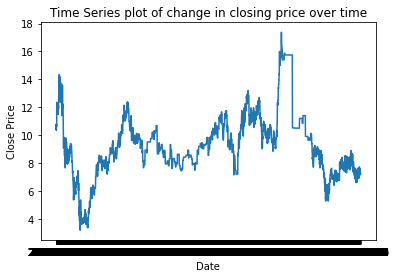

In [3]:
#plotting change in the close feature through time
plt.plot(df['Date'], df['Close'])
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.title("Time Series plot of change in closing price over time")
plt.show()

In [4]:
#Adding a feature of difference between concequent closing features
diff = [0]
close = df['Close']
for i in range(len(close)-1):
    dif = close.iloc[i+1] - close.iloc[i]
    diff.append(dif)
df['Difference Close'] = diff

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Difference Close
count,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000
mean,9.284934,9.309648,9.263693,9.284087,7.672125,1839.296765,-0.000925
std,2.291487,2.290451,2.296882,2.292897,1.896114,8386.584878,0.244725
min,3.200000,3.200000,3.200000,3.200000,2.555268,0.000000,-5.230000
25%,7.960000,7.990000,7.950000,7.950000,6.643698,0.000000,0.000000
50%,9.080000,9.100000,9.060000,9.070000,7.500000,0.000000,0.000000
75%,10.500000,10.500000,10.500000,10.500000,8.544178,1000.000000,0.000000
max,17.600000,18.350000,17.379999,17.379999,14.445863,186400.000000,1.500000


In [6]:
""" Adding the difference labels for categorical classification. For thresholds we used the 
    percentiels of the data we received from the df.describe() function"""
diff_labels = []
for d in diff:
    if d <= -0.18:
        diff_labels.append("Very Low")
    elif d > -0.18 and d < 0:
        diff_labels.append("Low")
    elif d == 0:
        diff_labels.append("Stationary")
    elif d > 0 and d <=0.19:
        diff_labels.append("High")
    elif d > 0.19:
        diff_labels.append("Very High")
df["Difference Close Labels"] = diff_labels

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Difference Close,Difference Close Labels
0,2007-09-18,10.45,10.45,10.45,10.45,8.344547,0,0.00,Stationary
1,2007-09-19,10.80,10.80,10.80,10.80,8.624030,1000,0.35,Very High
2,2007-09-20,10.35,10.75,10.35,10.35,8.264695,2200,-0.45,Very Low
3,2007-09-21,10.75,10.75,10.75,10.75,8.584105,500,0.40,Very High
4,2007-09-24,10.75,10.75,10.75,10.75,8.584105,0,0.00,Stationary


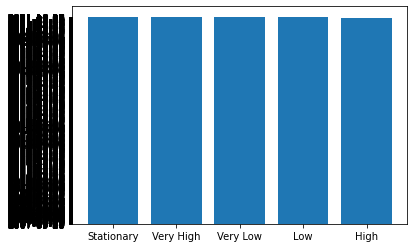

In [8]:
plt.bar(df['Difference Close Labels'], df['Date'])
plt.show()

In [9]:
"""Created another couple of categorical features based on the adjusted close feature to 
check if there is a differnce in predicting the different features"""
diff = ['Stationary']
close = df['Adj Close']
for i in range(len(close)-1):
    dif = close.iloc[i+1] - close.iloc[i]
    if dif <= -0.144:
        diff.append('Very Low')
    elif dif > -0.144 and dif < 0:
        diff.append("Low")
    elif dif == 0:
        diff.append("Stationary")
    elif dif > 0 and dif <= 0.16:
        diff.append("High")
    elif dif > 0.16:
        diff.append("Very High")
df['Difference ADJ Close Labels'] = diff
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Difference Close,Difference Close Labels,Difference ADJ Close Labels
0,2007-09-18,10.45,10.45,10.45,10.45,8.344547,0,0.00,Stationary,Stationary
1,2007-09-19,10.80,10.80,10.80,10.80,8.624030,1000,0.35,Very High,Very High
2,2007-09-20,10.35,10.75,10.35,10.35,8.264695,2200,-0.45,Very Low,Very Low
3,2007-09-21,10.75,10.75,10.75,10.75,8.584105,500,0.40,Very High,Very High
4,2007-09-24,10.75,10.75,10.75,10.75,8.584105,0,0.00,Stationary,Stationary


In [10]:
list(df['Difference Close Labels'] == df['Difference ADJ Close Labels']).__contains__(False)
#Labels based on Adjusted Close are different than those got from non-adjusted close. 
#We will use the adjusted labels

True

In [11]:
#Feature and Target division
X = df[['Open', 'High', 'Low', 'Volume', 'Date']]
y = df['Difference ADJ Close Labels']
y_sub = df[['Close', 'Difference ADJ Close Labels']]
X.shape

(3555, 5)

In [12]:
#Train-Test splits on the data
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y_sub, test_size=0.2, shuffle=False, random_state=0)

In [13]:
X_train = X_train_sub.drop('Date', axis=1)
X_test = X_test_sub.drop('Date', axis=1)
y_train_label = y_train_sub.drop('Close', axis=1)
y_train = y_train_sub.drop('Difference ADJ Close Labels', axis=1)
y_test_label = y_test_sub.drop('Close', axis=1)
y_test = y_test_sub.drop('Difference ADJ Close Labels', axis=1)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2844, 4)
(711, 4)
(2844, 1)
(711, 1)


In [15]:
#Linear regression on numerical close feature
clf = LinearRegression().fit(X_train[:-1], y_train[1:])
y_pred = clf.predict(X_test)
#metrics.mean_squared_error(y_test, y_pred)
metrics.r2_score(y_test, y_pred)

0.9956952861356362

In [16]:
#Labels from predicted values
y_pred_label = ['High']
for i in range(len(y_pred)-1):
    dif = y_pred[i+1] - y_pred[i]
    if dif <= -0.144:
        y_pred_label.append('Very Low')
    elif dif > -0.144 and dif < 0:
        y_pred_label.append("Low")
    elif dif == 0:
        y_pred_label.append('Stationary')
    elif dif > 0 and dif <= 0.16:
        y_pred_label.append("High")
    elif dif > 0.16:
        y_pred_label.append("Very High")
Linear_regression_prediction = y_pred_label

In [17]:
#accuracy of Logistic regression on predicting the labels
correct = 0
for i, j in zip(y_pred_label, y_test_label['Difference ADJ Close Labels']):
    if i==j:
        correct+=1
linear_transformed_acc = correct/len(y_pred_label)
linear_transformed_acc

0.5921237693389592

In [18]:
#SVM Classifier on categorical feauture
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train_label)
y_pre = clf.predict(X_test)
SVM_Prediction = y_pre

c:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#Categorical Accuracy of the SVM Model
correct = 0
for i, j in zip(y_pre, y_test_label):
    if i==j:
        correct+=1
print(correct/len(y_pre))

0.0


In [20]:
#Logistic Regression for categorical classification
clf = LogisticRegression(random_state=0).fit(X_train, y_train_label)
y_p = clf.predict(X_test)
Logistic_Regression_prediction = y_p

c:\Users\Hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
#Accuracy of Logistic Regression on categorical classification
correct = 0
for i, j in zip(y_p, y_test_label):
    if i==j:
        correct+=1
print(correct/len(y_pre))

0.0


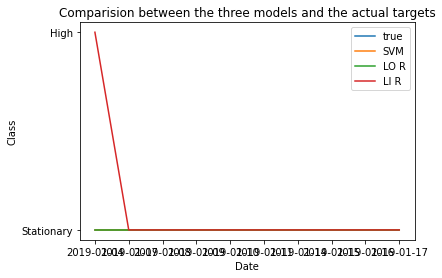

In [22]:
labels = ["true", "SVM", "LO R", "LI R"]
plt.plot(X_test_sub['Date'][:10], y_test_label['Difference ADJ Close Labels'][:10])
plt.plot(X_test_sub['Date'][:10], SVM_Prediction[:10])
plt.plot(X_test_sub['Date'][:10], Logistic_Regression_prediction[:10])
plt.plot(X_test_sub['Date'][:10], Linear_regression_prediction[:10])
plt.legend(labels)
plt.xlabel("Date")
plt.ylabel("Class")
plt.title("Comparision between the three models and the actual targets")
plt.show()

# Marokv Chain Helper Functions

In [23]:
# Getting the transition matrix, maps sequences to target market mobility
def get_transition_matrix(df):
    sequences = df['Sequences']
    targets = df['Difference ADJ Close Labels']
    target_set = list(set(targets))
    transitions = {}
    for seq in sequences:
        transitions[seq] = {}
    for seq in sequences:
        for target in target_set:
            transitions[seq][target] = 0
    for seq, target in zip(sequences, targets):
        transitions[seq][target] += 1/len(targets)
    return transitions


In [25]:
## Use the transition matrix to predict the current label based on the 
import random

def predict (df, transitions):
    sequences = df['Sequences']
    predicted_results = []
    for seq in sequences:
        probs = list(transitions[seq].values())
        labels = list(transitions[seq].keys())
        choice = random.choices(labels, probs, k=1)
        predicted_results.append(choice[0])
    return predicted_results
        

In [26]:
## Encoding each label for transitions

def get_code(label):
    if label == 'Very Low':
        code = 'VL'
    elif label == 'Low':
        code = 'L'
    elif label == 'Stationary':
        code = 'S'
    elif label == 'High':
        code = 'H'
    elif label == 'Very High':
        code = 'VH'
    return code

# 1-steps back Markov Chain

In [27]:
# Handling the data

seq = [None]
labels = df['Difference ADJ Close Labels']
for i in range(1, len(labels)):
    now = get_code(labels[i-1])
    seq.append(now)

df['Sequences'] = seq
one_step_df = df.iloc[1:, :]
one_step_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Difference Close,Difference Close Labels,Difference ADJ Close Labels,Sequences
1,2007-09-19,10.80,10.80,10.80,10.80,8.624030,1000,0.35,Very High,Very High,S
2,2007-09-20,10.35,10.75,10.35,10.35,8.264695,2200,-0.45,Very Low,Very Low,VH
3,2007-09-21,10.75,10.75,10.75,10.75,8.584105,500,0.40,Very High,Very High,VL
4,2007-09-24,10.75,10.75,10.75,10.75,8.584105,0,0.00,Stationary,Stationary,VH
5,2007-09-25,10.65,10.65,10.65,10.65,8.504252,800,-0.10,Low,Low,S


In [28]:
## Train transitions, Predict and Accuracy of prediction

transition_matrix = get_transition_matrix(one_step_df.iloc[:int(0.8*len(one_step_df)),:])
predicted = predict(one_step_df.iloc[int(0.2*len(one_step_df)):, :], transition_matrix)
one_step_accuracy = metrics.accuracy_score(predicted, list(one_step_df['Difference ADJ Close Labels'][int(0.2*len(one_step_df)):]))
one_step_accuracy


0.4265119549929676

# 2-Steps back Markov Chain

In [29]:
seq = [None, None]
labels = df['Difference ADJ Close Labels']
for i in range(2, len(labels)):
    oneback = get_code(labels[i-2])
    now = get_code(labels[i-1])
    seq.append(str(oneback +"-"+now))

df['Sequences'] = seq
two_step_df = df.iloc[2:, :]
two_step_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Difference Close,Difference Close Labels,Difference ADJ Close Labels,Sequences
2,2007-09-20,10.35,10.75,10.35,10.35,8.264695,2200,-0.45,Very Low,Very Low,S-VH
3,2007-09-21,10.75,10.75,10.75,10.75,8.584105,500,0.40,Very High,Very High,VH-VL
4,2007-09-24,10.75,10.75,10.75,10.75,8.584105,0,0.00,Stationary,Stationary,VL-VH
5,2007-09-25,10.65,10.65,10.65,10.65,8.504252,800,-0.10,Low,Low,VH-S
6,2007-09-26,10.65,10.65,10.65,10.65,8.504252,0,0.00,Stationary,Stationary,S-L


In [30]:


transition_matrix = get_transition_matrix(two_step_df.iloc[:int(0.8*len(two_step_df)),:])
predicted = predict(two_step_df.iloc[int(0.2*len(two_step_df)):, :], transition_matrix)
two_step_accuracy = metrics.accuracy_score(predicted, list(two_step_df['Difference ADJ Close Labels'][int(0.2*len(two_step_df)):]))
two_step_accuracy


0.46676046429827645

# 3-steps back Markov Chain

In [31]:
## Adding Sequences to the dataframe

seq = [None, None, None]
labels = df['Difference ADJ Close Labels']
for i in range(3, len(labels)):
    twoback = get_code(labels[i-3])
    oneback = get_code(labels[i-2])
    now = get_code(labels[i-1])
    seq.append(str(twoback + "-"+ oneback + "-"+ now))

df['Sequences'] = seq
three_step_df = df.iloc[3:, :]
three_step_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Difference Close,Difference Close Labels,Difference ADJ Close Labels,Sequences
3,2007-09-21,10.75,10.75,10.75,10.75,8.584105,500,0.40,Very High,Very High,S-VH-VL
4,2007-09-24,10.75,10.75,10.75,10.75,8.584105,0,0.00,Stationary,Stationary,VH-VL-VH
5,2007-09-25,10.65,10.65,10.65,10.65,8.504252,800,-0.10,Low,Low,VL-VH-S
6,2007-09-26,10.65,10.65,10.65,10.65,8.504252,0,0.00,Stationary,Stationary,VH-S-L
7,2007-09-27,11.50,11.50,11.50,11.50,9.182996,2400,0.85,Very High,Very High,S-L-S


In [32]:
## Train__transitions

transition_matrix = get_transition_matrix(three_step_df.iloc[:int(0.8*len(three_step_df)),:])
predicted = predict(three_step_df.iloc[int(0.2*len(three_step_df)):, :], transition_matrix)
three_step_accuracy = metrics.accuracy_score(predicted, list(three_step_df['Difference ADJ Close Labels'][int(0.2*len(three_step_df)):]))
three_step_accuracy


0.4989444053483462

# Four Step Marokv Chain

In [33]:
## Adding Sequences to the dataframe

seq = [None, None, None, None]
labels = df['Difference ADJ Close Labels']
for i in range(4, len(labels)):
    threeback = get_code(labels[i-4])
    twoback = get_code(labels[i-3])
    oneback = get_code(labels[i-2])
    now = get_code(labels[i-1])
    seq.append(str(threeback + "-" + twoback + "-"+ oneback + "-"+ now))

df['Sequences'] = seq
four_step_df = df.iloc[4:, :]
four_step_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Difference Close,Difference Close Labels,Difference ADJ Close Labels,Sequences
4,2007-09-24,10.75,10.75,10.75,10.75,8.584105,0,0.00,Stationary,Stationary,S-VH-VL-VH
5,2007-09-25,10.65,10.65,10.65,10.65,8.504252,800,-0.10,Low,Low,VH-VL-VH-S
6,2007-09-26,10.65,10.65,10.65,10.65,8.504252,0,0.00,Stationary,Stationary,VL-VH-S-L
7,2007-09-27,11.50,11.50,11.50,11.50,9.182996,2400,0.85,Very High,Very High,VH-S-L-S
8,2007-09-28,12.35,12.35,11.75,12.35,9.861739,48200,0.85,Very High,Very High,S-L-S-VH


In [34]:
transition_matrix = get_transition_matrix(four_step_df)
predicted = predict(four_step_df.iloc[int(0.2*len(four_step_df)):, :], transition_matrix)
four_step_accuracy = metrics.accuracy_score(predicted, list(four_step_df['Difference ADJ Close Labels'][int(0.2*len(four_step_df)):]))
four_step_accuracy

0.5564941921858501

<BarContainer object of 5 artists>

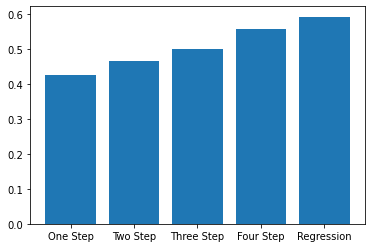

In [35]:
accuracies = [one_step_accuracy, two_step_accuracy, three_step_accuracy, four_step_accuracy, linear_transformed_acc]
names = ['One Step', 'Two Step', 'Three Step', 'Four Step', 'Regression']
plt.bar(names, accuracies)